In [1]:
from databaseCommunication import getNCount
from dataframeFormating import createLabeledDataFrame, fitRun_1and3b, fitRun_3b, getReducedDataframe, getReducedResults, deltaTime, N_polarized, N_polarized_pure3b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

getNCount(94000)

0.0

In [2]:
# [detuning, field direction], [imageID_start, imageID_end]
labels = [[['1.5V', 'Bz', 4], [96236, 96315]],
          [['1.5V', 'By', 4], [96316, 96395]],
          [['1.3V', 'Bz', 4], [96410, 96489]],
          [['1.3V', 'By', 4], [96491, 96555]],
          [['0.3V', 'Bz', 4], [96574, 96653]],
          [['0.3V', 'By', 4], [96656, 96735]],
          [['0.1V', 'Bz', 4], [96741, 96820]],
          [['0.1V', 'By', 4], [96823, 96902]]
         ]
excluded = []

In [5]:
#df = createLabeledDataFrame(labels)
#df['BECHoldTime'] = df['BECHoldTime'].astype(float)
#df.to_pickle('data_save_100321.pickle')

In [3]:
df = pd.read_pickle('data_save_100321.pickle')

# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)
df

,imageID,BECHoldTime,TOF,nCount,detuning,field_direction
0,96236.0,10.0,4,178287.0,1.5V,Bz
1,96237.0,20.0,4,167573.0,1.5V,Bz
2,96238.0,8.0,4,188216.0,1.5V,Bz
3,96239.0,200.0,4,119807.0,1.5V,Bz
4,96240.0,140.0,4,145937.0,1.5V,Bz
...,...,...,...,...,...,...
620,96898.0,70.0,4,111255.0,0.1V,By
621,96899.0,2.0,4,148229.0,0.1V,By
622,96900.0,200.0,4,85510.0,0.1V,By
623,96901.0,200.0,4,91240.0,0.1V,By


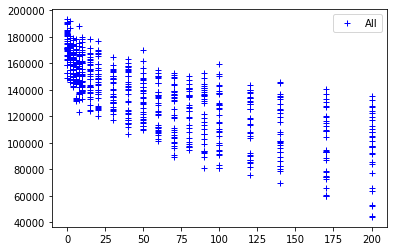

In [4]:
plt.figure()
plt.plot(df['BECHoldTime'], df['nCount'], '+', color = 'blue', label = 'All')
plt.legend()
plt.show()

#run = df[df['detuning'] == '0.5GHz']
#run1 = run[run['field_direction'] == 'Bz']
#run2 = run[run['field_direction'] == 'By']
#plt.figure()
#plt.plot(run1['BECHoldTime'], run1['nCount'], '+', color = 'blue', label = 'Bz')
#plt.plot(run2['BECHoldTime'], run2['nCount'], '+', color = 'red', label = 'By')
#plt.legend()
#plt.show()

We fit the polarized sample to $dN/dt = -\alpha N-\gamma N^{3}$, so $N(t) = \frac{\sqrt{\alpha}}{\sqrt{e^{2\alpha t}\left(\frac{a}{N(0)^{2}}+\gamma\right)-\gamma}}$ and the mixture one to $dN/dt = -\alpha N - \beta N^{2} -\gamma N^{3}$, so $N(t) = complicated$

In [8]:
results = []
for run in labels:
    detuning, field_direction, TOF = run[0]
    print(detuning, field_direction, TOF)
    popt, pcov = fitRun_1and3b(df, detuning, field_direction, TOF)
    results += [{'detuning' : detuning,
                        'TOF' : TOF,
                        'field_direction' : field_direction,
                        'N0' : popt[0],
                        'alpha' : popt[1],
                        'gamma' : popt[2]}]
resultsDF = pd.DataFrame(results)
print('\n')
print(resultsDF)
print('\n')
print(resultsDF['alpha']*resultsDF['N0']/(resultsDF['gamma']*(resultsDF['N0']**3)))
#perr = np.sqrt(np.diag(pcov))

1.5V Bz 4
1.5V By 4
1.3V Bz 4
1.3V By 4
0.3V Bz 4
0.3V By 4
0.1V Bz 4
0.1V By 4


  detuning  TOF field_direction             N0     alpha         gamma
0     1.5V    4              Bz  171862.483205 -0.001516  1.781407e-13
1     1.5V    4              By  161559.820110  0.000527  3.789657e-13
2     1.3V    4              Bz  171331.107782  0.001096  4.992941e-14
3     1.3V    4              By  172767.139408  0.002115  3.476587e-13
4     0.3V    4              Bz  172132.740598 -0.005497  3.482039e-13
5     0.3V    4              By  160597.171099 -0.002073  3.342729e-13
6     0.1V    4              Bz  164224.555511 -0.000735  1.819102e-13
7     0.1V    4              By  147078.369411 -0.001310  3.520521e-13


0   -0.288189
1    0.053284
2    0.747942
3    0.203842
4   -0.532817
5   -0.240423
6   -0.149797
7   -0.172032
dtype: float64


We notice the decay is nearly 3-body in all case. To ensure that we can look at $\alpha N_{0}/(\gamma*N_{0}^{3})$ which at $t=0$ is never above a 10\%. So let's just fit to a 3body decay curve.
$dN/dt = -\gamma N^{3}$, so $N(t) = \frac{N_{0}}{\sqrt{1+N_{0}^{2}\gamma t}}$.

In [9]:
results = []

for run in labels:
    detuning, field_direction, TOF = run[0]
    popt, pcov = fitRun_3b(df, detuning, field_direction, TOF)
    results += [{'detuning' : detuning,
                        'TOF' : TOF,
                        'field_direction' : field_direction,
                        'N0' : popt[0],
                        'gamma' : popt[1]}]
resultsDF_pure3b = pd.DataFrame(results)
resultsDF_pure3b
#perr = np.sqrt(np.diag(pcov))

,detuning,TOF,field_direction,N0,gamma
0,1.5V,4,Bz,170488.818985,2.072603e-13
1,1.5V,4,By,162309.322511,8.455356e-13
2,1.3V,4,Bz,172308.838039,2.041631e-13
3,1.3V,4,By,175654.967544,1.023136e-12
4,0.3V,4,Bz,167774.066607,1.648546e-13
5,0.3V,4,By,158370.733655,3.952421e-13
6,0.1V,4,Bz,163542.227865,2.811949e-13
7,0.1V,4,By,145784.648935,4.974648e-13


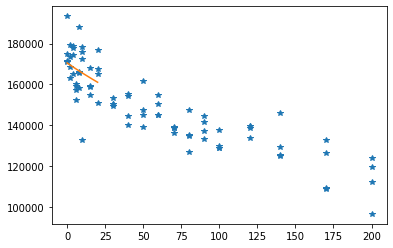

In [11]:
df_reduced = getReducedDataframe(df, detuning = '1.5V', field_direction = 'Bz', TOF = 4)
result_reduced = getReducedResults(resultsDF_pure3b, detuning = '1.5V', field_direction = 'Bz', TOF = 4)
holdTime = np.linspace(0,20, 300)
plt.figure()
plt.plot(df_reduced['BECHoldTime'], df_reduced['nCount'], '*')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced['N0'][0], result_reduced['gamma'][0]))
plt.show()

Now we should look at how much time we should shift:

In [12]:
deltaTime(resultsDF_pure3b, '1.5V', 4)

17.15171517151715

Now we can calculate the ration of the beta, provided the derivative of the N_polarized_pure3b function: $\frac{dN}{dt} = -\frac{1}{2}N_{0}^{3}\gamma\left(1+N_{0}^{2}\gamma t\right)^{-3/2}$

In [16]:
def dN_polarized_pure3b_dt(t, N0, gamma):
    return -0.5*N0**3*gamma*(1+N0**2*gamma*t)**(-3/2)

def getBeta(results, detuning, field_direction, TOF):
    temp = results[results['detuning'] == detuning]
    temp = temp[temp['TOF'] == TOF]
    return temp[temp['field_direction'] == field_direction]['gamma']

results_betaRatio = []
for detuning in ['1.5V', '1.3V', '0.3V', '0.1V']:
    for TOF in [4]:
        print(detuning, TOF)
        beta_y_init = getBeta(resultsDF_pure3b, detuning, 'By', TOF)
        beta_z_init = getBeta(resultsDF_pure3b, detuning, 'Bz', TOF)
        #dt = deltaTime(resultsDF_pure3b, detuning, TOF)
        
        results_By = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)
        results_Bz = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
        N0_y, gamma_y = results_By['N0'].iloc[0], results_By['gamma'].iloc[0]
        N0_z, gamma_z = results_Bz['N0'].iloc[0], results_Bz['gamma'].iloc[0]
        
        beta_y = dN_polarized_pure3b_dt(0, N0_y, gamma_y)
        #beta_z = dN_polarized_pure3b_dt(dt, N0_z, gamma_z)
        beta_z = dN_polarized_pure3b_dt(0, N0_z, gamma_z)
        
        results_betaRatio += [{'detuning' : detuning,
                        'TOF' : TOF,
                        'betaRatio' : beta_z/beta_y}]

results_betaRatio = pd.DataFrame(results_betaRatio)

results_betaRatio

1.5V 4
1.3V 4
0.3V 4
0.1V 4


,detuning,TOF,betaRatio
0,1.5V,4,0.284081
1,1.3V,4,0.188358
2,0.3V,4,0.495893
3,0.1V,4,0.797994


In [18]:
detuning = '1.5V'
TOF = 4
beta_y_init = getBeta(resultsDF_pure3b, detuning, 'By', TOF)  # this is the gamma from the fit
beta_z_init = getBeta(resultsDF_pure3b, detuning, 'Bz', TOF)
dt = deltaTime(resultsDF_pure3b, detuning, TOF)

results_By = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)  # this is the full results of a fit
results_Bz = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
N0_y, gamma_y = results_By['N0'].iloc[0], results_By['gamma'].iloc[0]
N0_z, gamma_z = results_Bz['N0'].iloc[0], results_Bz['gamma'].iloc[0]
        
beta_y = dN_polarized_pure3b_dt(0, N0_y, gamma_y)
beta_z = dN_polarized_pure3b_dt(dt, N0_z, gamma_z)
#beta_z/beta_y
print(beta_y)
print(beta_z)


-1807.7246420591434
-443.11571006855024


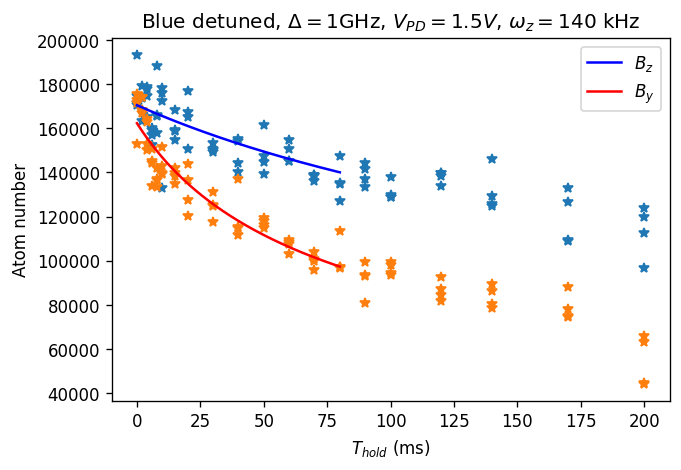

In [20]:
detuning = '1.5V'
TOF = 4
df_reduced_z = getReducedDataframe(df, detuning,'Bz', TOF)
df_reduced_y = getReducedDataframe(df, detuning,'By', TOF)
result_reduced_z = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
result_reduced_y = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)

dNdt = dN_polarized_pure3b_dt(dt, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0])
holdTime = np.linspace(0,80, 300)
plt.figure(dpi = 120)
plt.plot(df_reduced_z['BECHoldTime'], df_reduced_z['nCount'], '*')
plt.plot(df_reduced_y['BECHoldTime'], df_reduced_y['nCount'], '*')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0]), color = 'blue', label = '$B_{z}$')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_y['N0'].iloc[0], result_reduced_y['gamma'].iloc[0]), color = 'red', label = '$B_{y}$')
plt.title('Blue detuned, $\Delta = 1$GHz, $V_{PD} = 1.5V$, $\omega_{z} = 140$ kHz')
plt.legend()
plt.xlabel('$T_{hold}$ (ms)')
plt.ylabel('Atom number')
plt.show()

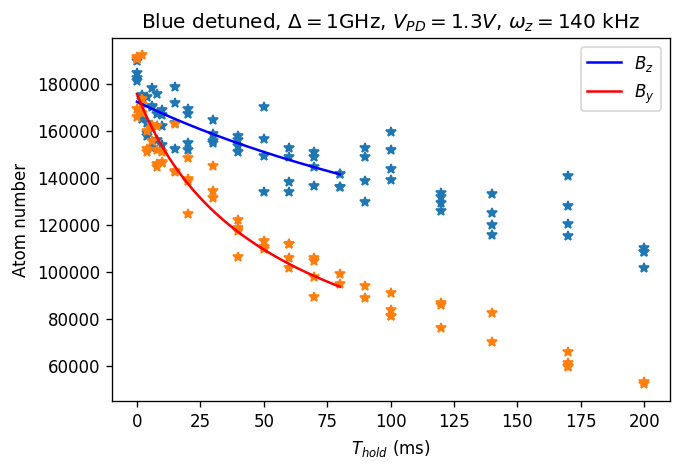

In [22]:
detuning = '1.3V'
TOF = 4
df_reduced_z = getReducedDataframe(df, detuning,'Bz', TOF)
df_reduced_y = getReducedDataframe(df, detuning,'By', TOF)
result_reduced_z = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
result_reduced_y = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)

dNdt = dN_polarized_pure3b_dt(dt, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0])
holdTime = np.linspace(0,80, 300)
plt.figure(dpi = 120)
plt.plot(df_reduced_z['BECHoldTime'], df_reduced_z['nCount'], '*')
plt.plot(df_reduced_y['BECHoldTime'], df_reduced_y['nCount'], '*')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_z['N0'].iloc[0], result_reduced_z['gamma'].iloc[0]), color = 'blue', label = '$B_{z}$')
plt.plot(holdTime, N_polarized_pure3b(holdTime, result_reduced_y['N0'].iloc[0], result_reduced_y['gamma'].iloc[0]), color = 'red', label = '$B_{y}$')
plt.title('Blue detuned, $\Delta = 1$GHz, $V_{PD} = 1.3V$, $\omega_{z} = 140$ kHz')
plt.legend()
plt.xlabel('$T_{hold}$ (ms)')
plt.ylabel('Atom number')
plt.show()

In [15]:
resultsDF_pure3b

,detuning,TOF,field_direction,N0,gamma
0,0.5GHz,3,Bz,131028.827443,1.713659e-12
1,0.5GHz,3,By,132199.355160,3.000413e-12


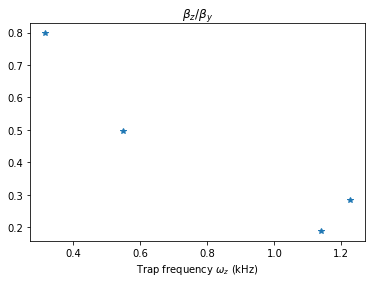

In [21]:
points15V = results_betaRatio[results_betaRatio['detuning'] == '1.5V']['betaRatio']
points13V = results_betaRatio[results_betaRatio['detuning'] == '1.3V']['betaRatio']
points03V = results_betaRatio[results_betaRatio['detuning'] == '0.3V']['betaRatio']
points01V = results_betaRatio[results_betaRatio['detuning'] == '0.1V']['betaRatio']
ratios = [points15V, points13V, points03V, points01V]
plt.figure()
plt.plot(np.sqrt(np.array([1.5, 1.3, 0.3, 0.1])), ratios, '*')
plt.title(r'$\beta_{z}/\beta_{y}$')
plt.xlabel(r'Trap frequency $\omega_{z}$ (kHz)')
plt.show()

In [17]:
results_betaRatio

,detuning,TOF,betaRatio
0,0.5GHz,3,0.556104


It doesn't look good at all, it should be reversed, the $\beta_{z}$ should be equal to $\beta_{y}$ for small $\omega_{z}$ and drop at the threshold.

0.5GHz 3


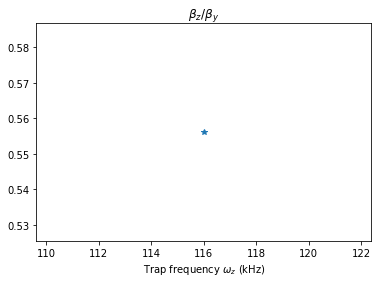

In [26]:
def dN_polarized_pure3b_dt(t, N0, gamma):
    return -0.5*N0**3*gamma*(1+N0**2*gamma*t)**(-3/2)

def getBeta(results, detuning, field_direction, TOF):
    temp = results[results['detuning'] == detuning]
    temp = temp[temp['TOF'] == TOF]
    return temp[temp['field_direction'] == field_direction]['gamma']

results_betaRatio = []
for detuning in ['0.5GHz']:#, '1.5GHz']:
    for TOF in [3]:#, 3]:
        print(detuning, TOF)
        beta_y_init = getBeta(resultsDF_pure3b, detuning, 'By', TOF)
        beta_z_init = getBeta(resultsDF_pure3b, detuning, 'Bz', TOF)
        dt = deltaTime(resultsDF_pure3b, detuning, TOF)
        
        results_By = getReducedResults(resultsDF_pure3b, detuning, 'By', TOF)
        results_Bz = getReducedResults(resultsDF_pure3b, detuning, 'Bz', TOF)
        N0_y, gamma_y = results_By['N0'].iloc[0], results_By['gamma'].iloc[0]
        N0_z, gamma_z = results_Bz['N0'].iloc[0], results_Bz['gamma'].iloc[0]
        
        beta_y = dN_polarized_pure3b_dt(0, N0_y, gamma_y)
        beta_z = dN_polarized_pure3b_dt(0, N0_z, gamma_z)
        
        results_betaRatio += [{'detuning' : detuning,
                        'TOF' : TOF,
                        'betaRatio' : beta_z/beta_y}]

results_betaRatio = pd.DataFrame(results_betaRatio)

results_betaRatio

points05G = results_betaRatio[results_betaRatio['detuning'] == '0.5GHz']['betaRatio']
#points15G = results_betaRatio[results_betaRatio['detuning'] == '1.5GHz']['betaRatio']

plt.figure()
plt.plot([116], points05G, '*')
#plt.plot([96], points15G, '*')
plt.title(r'$\beta_{z}/\beta_{y}$')
plt.xlabel(r'Trap frequency $\omega_{z}$ (kHz)')
plt.show()